# Importing the Data:

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\deepa\\Downloads\\walmart_sales.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values and data types
print(data.info())

# Summary statistics
print(data.describe())


# Data Processing/Cleaning:

In [2]:
# Handle missing values
data.fillna(0, inplace=True)  # Fill missing values with zeros, replace with appropriate method if needed

# Check for outliers and perform outlier treatment if necessary
# For instance, using z-score or IQR method for outlier detection

# Example:
z_scores = (data['Weekly_Sales'] - data['Weekly_Sales'].mean()) / data['Weekly_Sales'].std()
outlier_threshold = 3  # Adjust this threshold as needed
data = data[(z_scores < outlier_threshold)]

# Ensure data consistency and correctness
# Convert data types if needed: data['Date'] = pd.to_datetime(data['Date'])


# Visualizaing Trending Sales:

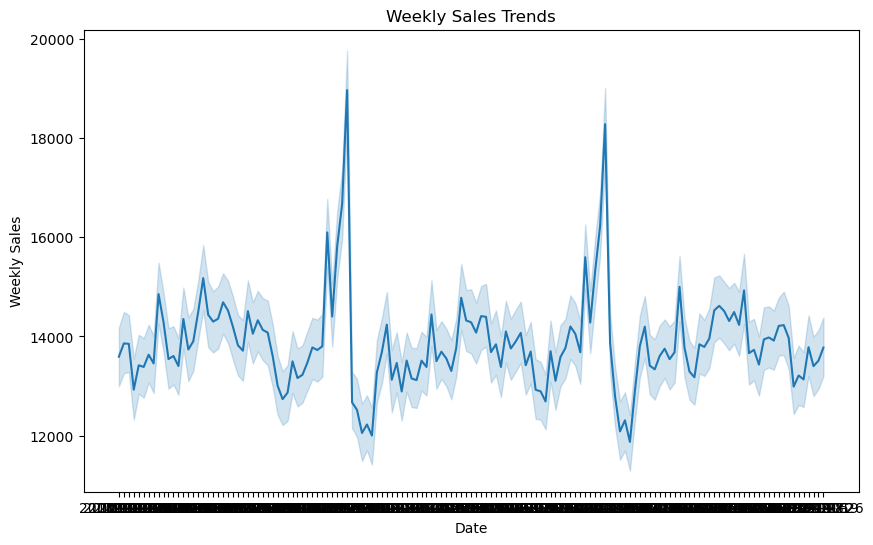

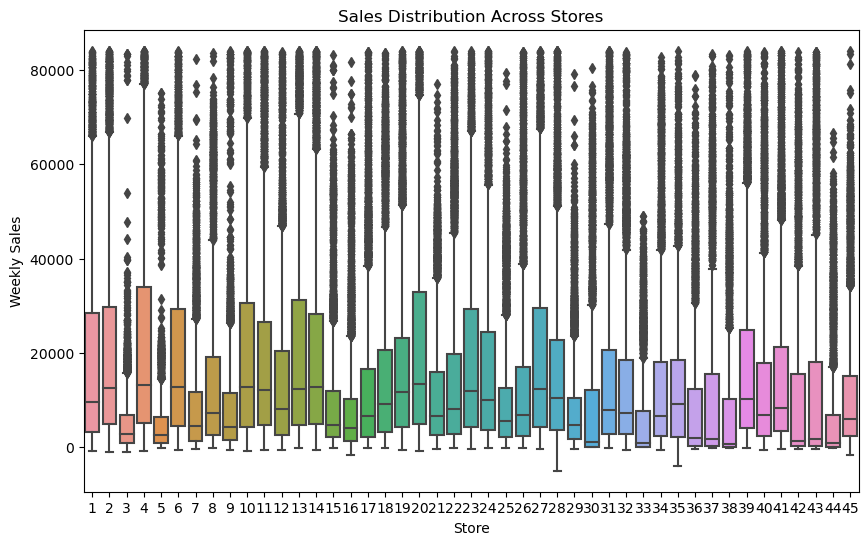

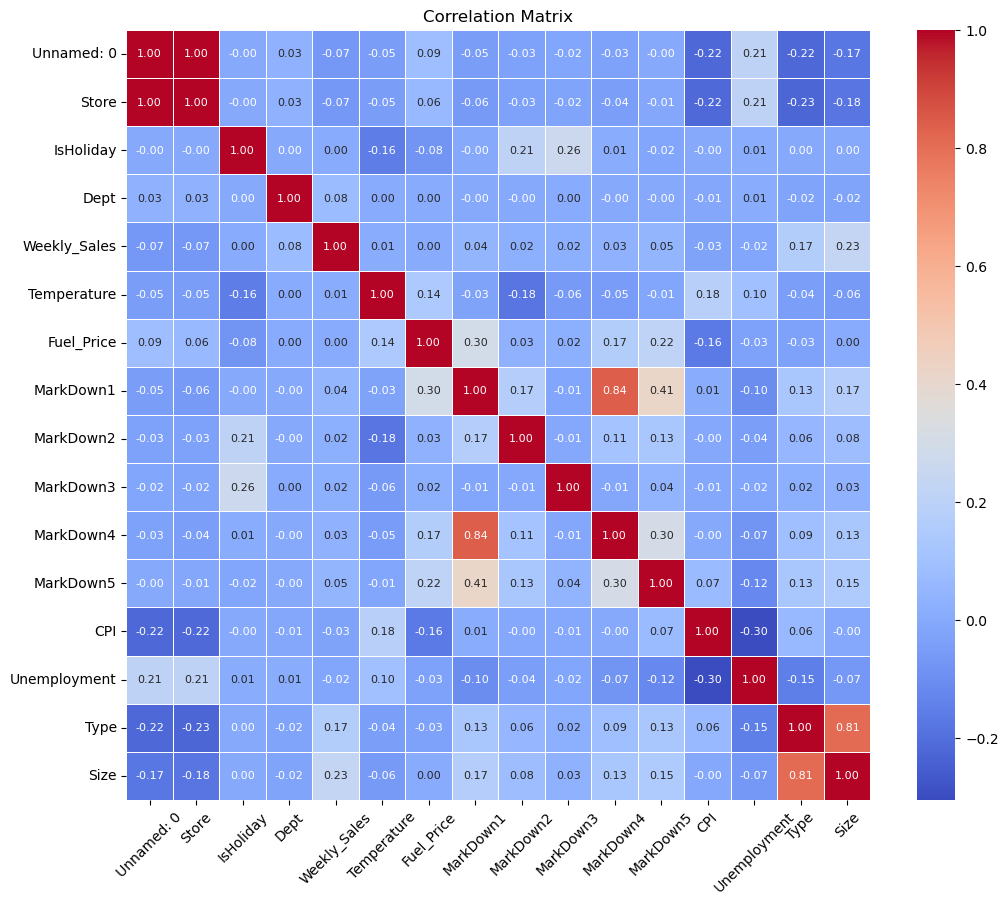

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sales trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Visualize sales distribution across stores or departments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.title('Sales Distribution Across Stores')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

# Drop non-numeric columns before calculating the correlation matrix
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns

# Explore correlations between numeric variables
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()


# Sales Forecasting:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming 'data' is your DataFrame containing the Walmart sales data

# Select features and target variable
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor model with adjusted hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# You can adjust other hyperparameters like max_depth, min_samples_split, etc.

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

# Sales predictions for a new dataset (example)
new_data = pd.DataFrame({'Store': [1, 2, 3], 'Temperature': [25, 30, 22], 'Fuel_Price': [2.5, 2.7, 2.4],
                         'CPI': [210, 220, 230], 'Unemployment': [8, 7, 6]})
new_predictions = model.predict(new_data)
print('Predictions for new data:')
print(new_predictions)


Mean Squared Error (MSE): 263212515.3005651
Root Mean Squared Error (RMSE): 16223.825544567628
R-squared (R2) Score: 0.0777406294726618
Predictions for new data:
[15609.47493087 21492.74770731  6324.36865271]


# Using sklearn:


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming 'data' is your DataFrame containing the Walmart sales data

# Select features and target variable
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=  20.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=  20.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=  20.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=  40.7s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=  41.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=  41.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time= 1.1min
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time= 1.1min
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time= 1.1min
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=  27.7s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=  27.0s
[CV] END ..learning_rate=0.05, max_depth=4, n_es

# Training the model:

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load the dataset
data = pd.read_csv('C:\\Users\\deepa\\Downloads\\walmart_sales.csv')

# Splitting the data into features (X) and the target variable (y)
X = data.drop(['Date', 'Weekly_Sales'], axis=1)  # Features
y = data['Weekly_Sales']  # Target variable

# Assuming 'Date' column is a string and other columns are numerical/categorical
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the Gradient Boosting Regressor model with identified hyperparameters
best_gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=300)

# Append the model to the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', best_gb_model)])  # Replace best_gb_model with your identified best model

# Preprocessing of training data, fit model
pipeline.fit(X_train, y_train)

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load the dataset
data = pd.read_csv('C:\\Users\\deepa\\Downloads\\walmart_sales.csv')

# Splitting the data into features (X) and the target variable (y)
X = data.drop(['Date', 'Weekly_Sales'], axis=1)  # Features
y = data['Weekly_Sales']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the Gradient Boosting Regressor model with identified hyperparameters
best_gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=300)

# Append the model to the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', best_gb_model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


In [16]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\deepa\\Downloads\\walmart_sales.csv')

# Display column names
print(data.columns)



Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')
